## Annual and Monthly Means of the Maximum Temperature, Depth at Maximum Temperature, and Salinity of WOD PFL Instrument

This notebook reads a csv file that stores the maximum temperature, depth at maximum temperature and salinity time series and then plots the annual and monthly means of each.   

In [1]:
# import libraries
from datetime import datetime, timedelta
import numpy as np
import xarray
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as ticker
import pandas as pd
from pandas import Series, DataFrame
import gsw
import cmocean
import sys
import glob
import errno
import os
import os.path
import geopandas as gpd
import string
import time
import csv
from matplotlib.backends.backend_pdf import PdfPages

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\cmocean\tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
df1 = pd.read_csv('path\csvfile', header=None, error_bad_lines=False, delimiter=',')
# Insert file path you stored MaxTemp in
df1.columns = ['YearTime', 'Absolute_Salinity_MaxTemp', 'MaxDepth', 'MaxTemp', 'Practical_Salinity_MaxTemp']
# Setup the column headers
df1

,YearTime,Absolute_Salinity_MaxTemp,MaxDepth,MaxTemp,Practical_Salinity_MaxTemp
0,2005-01-06 20:31:51.959266304,34.864066,-313.508656,0.706,34.692368
1,2005-01-17 00:08:27.240016896,34.864168,-303.623718,0.708,34.692486
2,2005-01-26 23:54:21.959266304,34.864048,-323.395584,0.686,34.692307
3,2005-02-06 00:59:02.760264704,34.863152,-313.215594,0.660,34.691425
4,2005-02-15 21:11:16.441955328,34.862988,-293.939014,0.662,34.691307
5,2005-02-25 22:49:41.152152576,34.863108,-313.711987,0.653,34.691364
6,2005-03-07 20:34:41.152152576,34.863146,-303.431339,0.647,34.691425
7,2005-03-17 22:55:18.847847424,34.862271,-323.402588,0.644,34.690483
8,2005-03-27 20:37:30,34.863210,-323.105002,0.648,34.691425
9,2005-04-06 23:20:38.040733696,34.862202,-323.103681,0.631,34.690426


In [3]:
df2 = df1.set_index("YearTime", drop = False) # Set time as index of the dataframe
df2

,YearTime,Absolute_Salinity_MaxTemp,MaxDepth,MaxTemp,Practical_Salinity_MaxTemp
YearTime,,,,,
2005-01-06 20:31:51.959266304,2005-01-06 20:31:51.959266304,34.864066,-313.508656,0.706,34.692368
2005-01-17 00:08:27.240016896,2005-01-17 00:08:27.240016896,34.864168,-303.623718,0.708,34.692486
2005-01-26 23:54:21.959266304,2005-01-26 23:54:21.959266304,34.864048,-323.395584,0.686,34.692307
2005-02-06 00:59:02.760264704,2005-02-06 00:59:02.760264704,34.863152,-313.215594,0.660,34.691425
2005-02-15 21:11:16.441955328,2005-02-15 21:11:16.441955328,34.862988,-293.939014,0.662,34.691307
2005-02-25 22:49:41.152152576,2005-02-25 22:49:41.152152576,34.863108,-313.711987,0.653,34.691364
2005-03-07 20:34:41.152152576,2005-03-07 20:34:41.152152576,34.863146,-303.431339,0.647,34.691425
2005-03-17 22:55:18.847847424,2005-03-17 22:55:18.847847424,34.862271,-323.402588,0.644,34.690483
2005-03-27 20:37:30,2005-03-27 20:37:30,34.863210,-323.105002,0.648,34.691425


   YearTime      MEAN
0      1999  0.614667
1      2005  0.586063
2      2006  0.509316
3      2007  0.525563
4      2008  0.482153
5      2009  0.520716
6      2010  0.634297
7      2011  0.571094
8      2012  0.524488
9      2013  0.685354
10     2014  0.706685
11     2015  0.781281
12     2016  0.803696
13     2017  1.094700


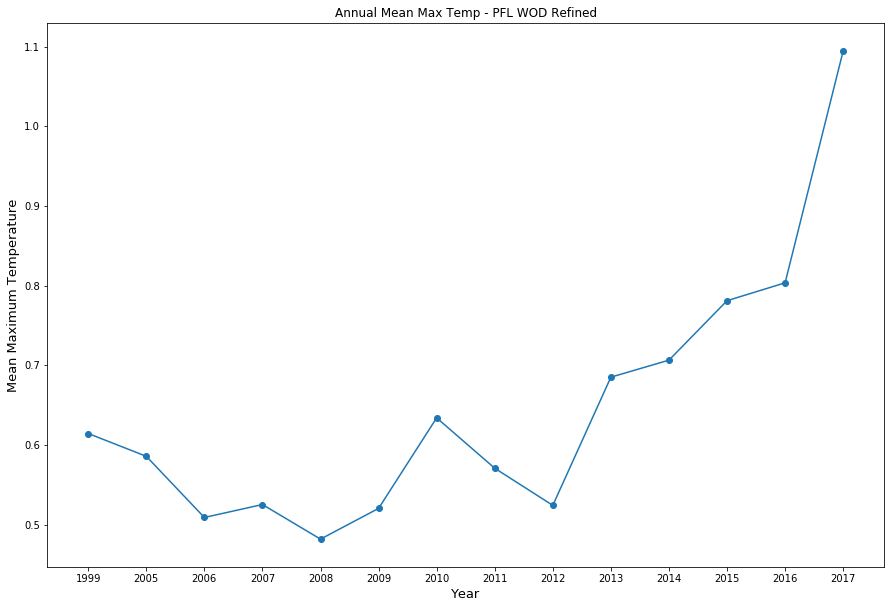

In [6]:
# Plot Annual Mean Maximum Temperature
df3 = df2['MaxTemp'].groupby(df2['YearTime'].str[:4]).mean().rename('MEAN').reset_index()
print (df3)

fig=plt.figure(figsize=(15,10))
plt.plot(df3['YearTime'], df3['MEAN'])
plt.scatter(df3['YearTime'], df3['MEAN'])
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Maximum Temperature', fontsize = 13)
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Annual Mean Max Temp - PFL WOD Refined')
plt.show()

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


    YearTime      mean  count
0    1999-12  0.614667      6
1    2005-01  0.700000      6
2    2005-02  0.658333      6
3    2005-03  0.603909     22
4    2005-04  0.585538     26
5    2005-05  0.643000     10
6    2005-06  0.649333      6
7    2005-07  0.553400     10
8    2005-08  0.606625     16
9    2005-09  0.581875     16
10   2005-10  0.538250     16
11   2005-11  0.515375     16
12   2005-12  0.525500      8
13   2006-01  0.548273     22
14   2006-02  0.537300     20
15   2006-03  0.559067     30
16   2006-04  0.522600     40
17   2006-05  0.468571     14
18   2006-06  0.477167     12
19   2006-07  0.473667     12
20   2006-08  0.465286     14
21   2006-09  0.465667     12
22   2006-10  0.465400     10
23   2006-11  0.474333     12
24   2006-12  0.507400     30
25   2007-01  0.523867     30
26   2007-02  0.520125     32
27   2007-03  0.535000     18
28   2007-04  0.537000     12
29   2007-12  0.505000      4
..       ...       ...    ...
91   2014-06  0.756600     10
92   2014-

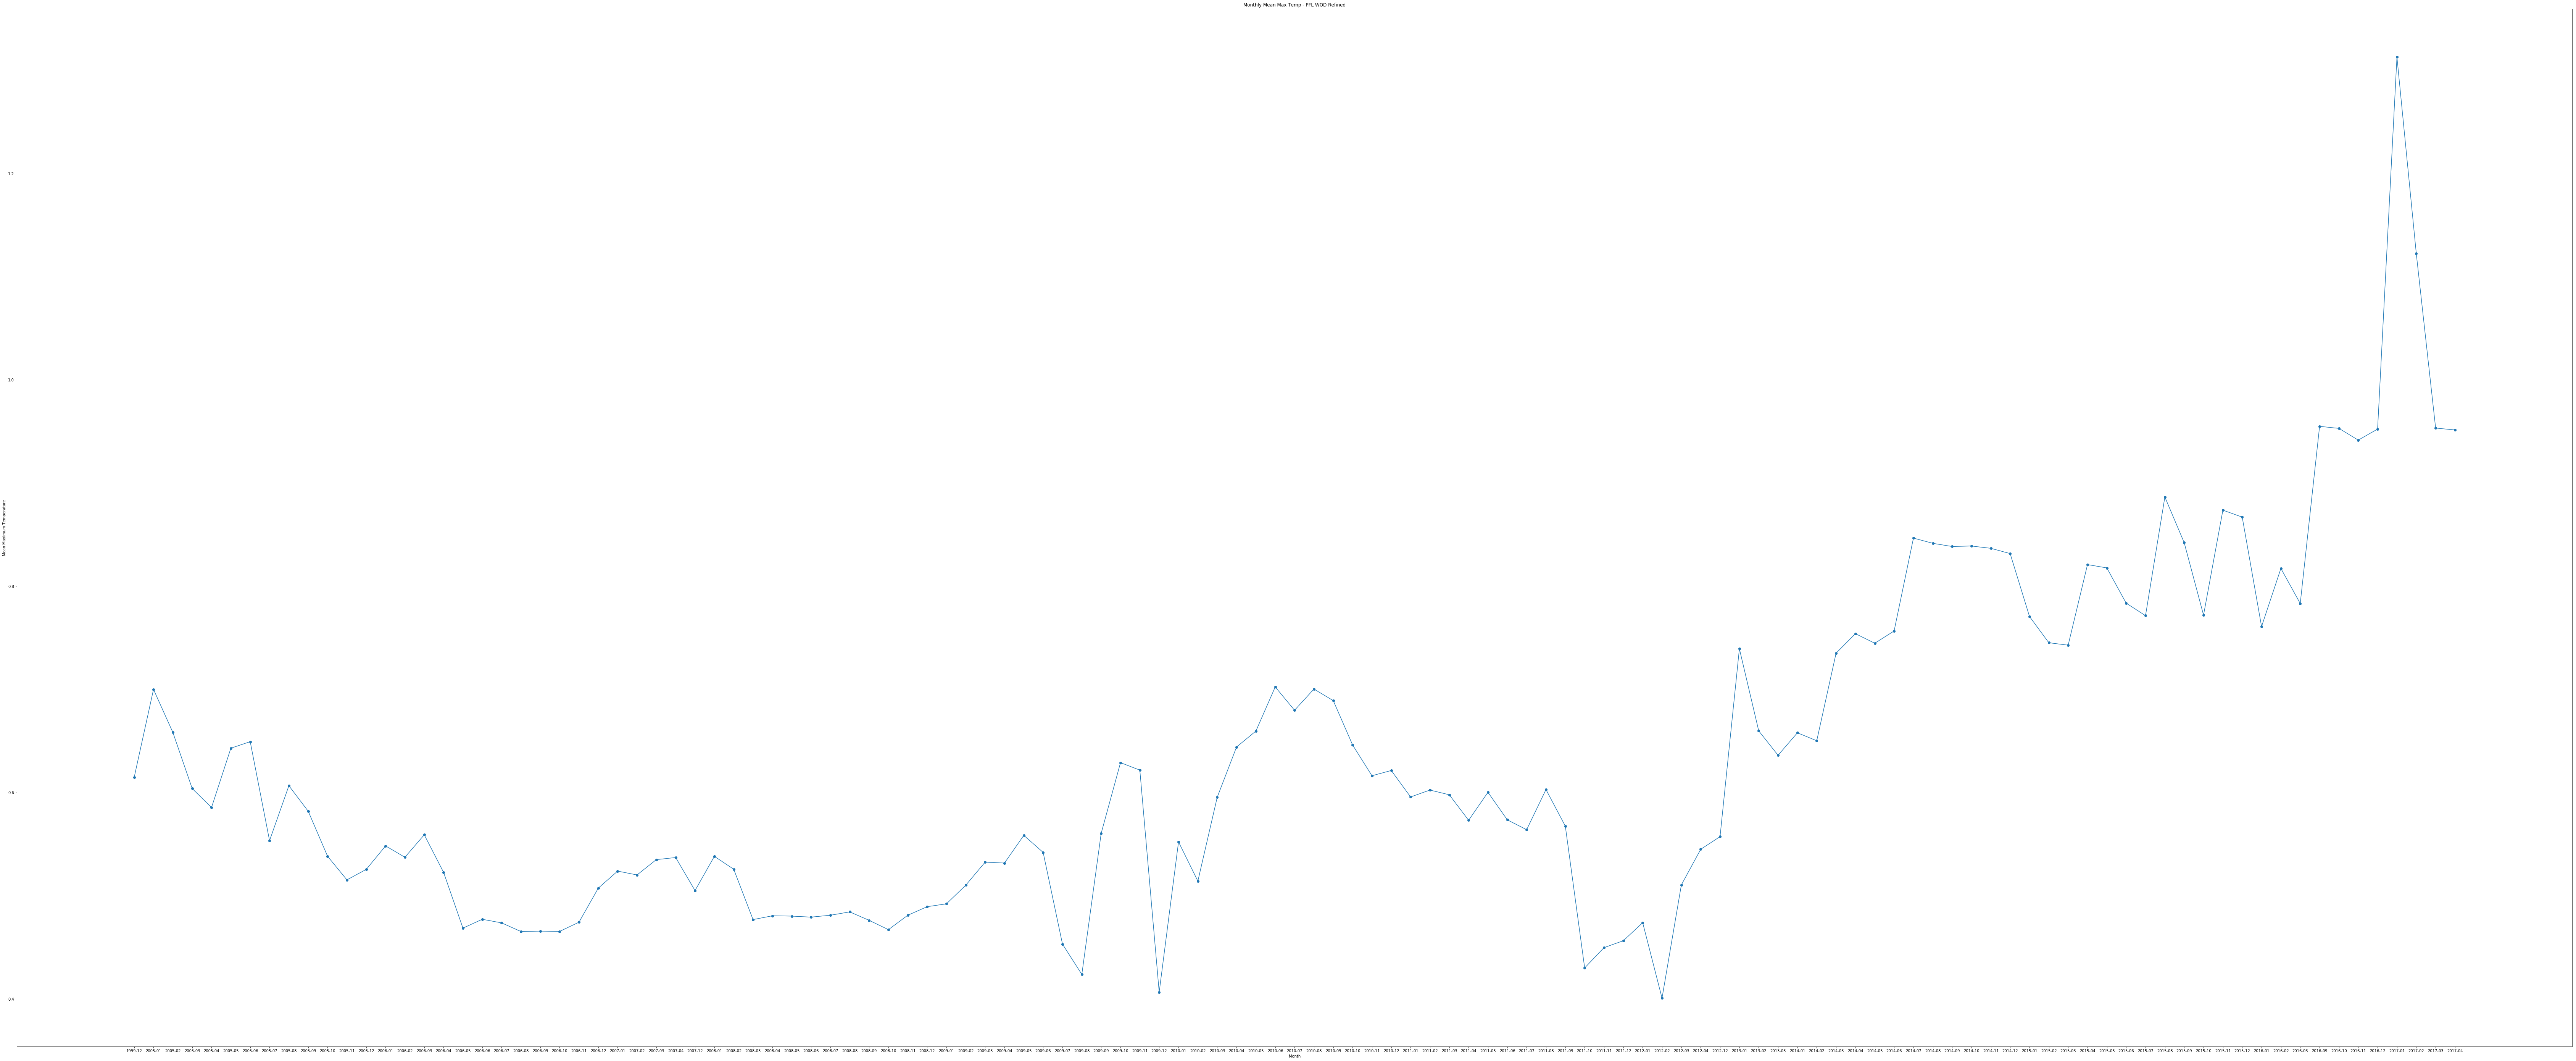

In [7]:
# Plot Monthly Mean Maximum Temperature and monthly datapoints count
df3m = df2['MaxTemp'].groupby(df2['YearTime'].str[:7]).agg(['mean', 'count']).reset_index()
print (df3m)

x = df3m['YearTime']
y = df3m['mean']

plt.figure(figsize=(120,50))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('Mean Maximum Temperature')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Monthly Mean Max Temp - PFL WOD Refined')
plt.show()

   YearTime      mean       std  count
0      1999  0.614667  0.135205      6
1      2005  0.586063  0.076677    158
2      2006  0.509316  0.071449    228
3      2007  0.525563  0.073925     96
4      2008  0.482153  0.068387    720
5      2009  0.520716  0.132788    218
6      2010  0.634297  0.204126    344
7      2011  0.571094  0.153776    320
8      2012  0.524488  0.115143     86
9      2013  0.685354  0.167715    158
10     2014  0.706685  0.176499    546
11     2015  0.781281  0.071970    342
12     2016  0.803696  0.084926    112
13     2017  1.094700  0.247401     20


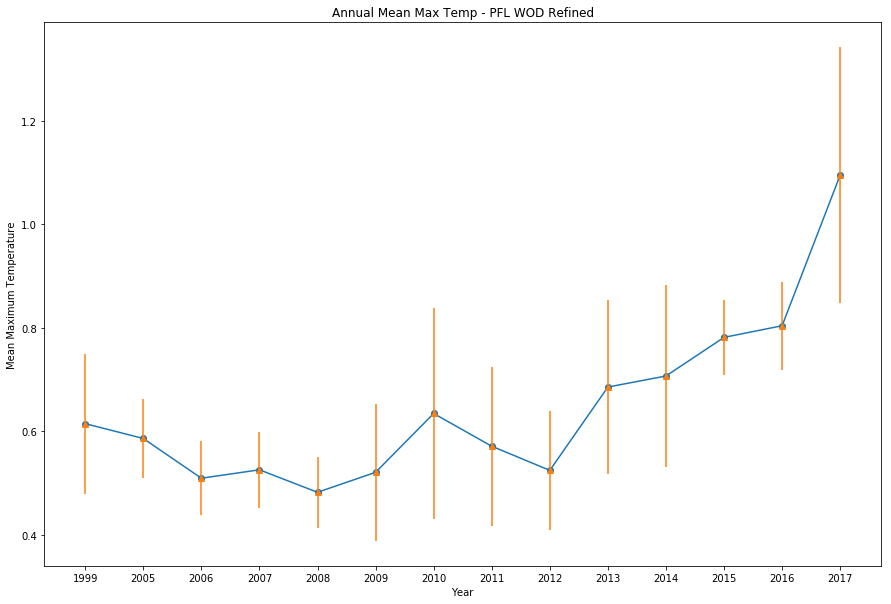

In [8]:
# Plot Annual Mean Maximun Temperature with Std. Dev. and annual datapoints count
df4 = df2['MaxTemp'].groupby(df2['YearTime'].str[:4]).agg(['mean', 'std', 'count']).reset_index()
print (df4)

x = df4['YearTime']
y = df4['mean'] # Mean dataframe
e = df4['std'] # Standard Deviation dataframe

plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Mean Maximum Temperature')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Annual Mean Max Temp - PFL WOD Refined')
plt.show()

   YearTime        MEAN
0      1999 -256.470735
1      2005 -325.886074
2      2006 -487.159480
3      2007 -411.344170
4      2008 -427.732027
5      2009 -420.492111
6      2010 -332.771753
7      2011 -319.145262
8      2012 -313.730473
9      2013 -242.899311
10     2014 -228.839900
11     2015 -203.790993
12     2016 -182.646454
13     2017 -108.682075


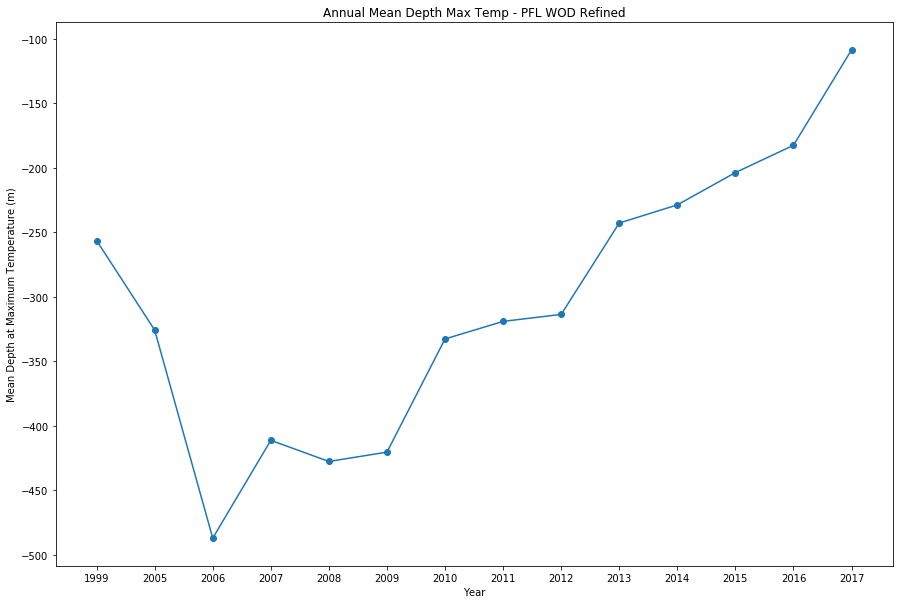

In [9]:
# Plot Annual Mean Depth at Maximum Temperature
df5 = df2['MaxDepth'].groupby(df2['YearTime'].str[:4]).mean().rename('MEAN').reset_index()
print (df5)

plt.figure(figsize=(15,10))
plt.plot(df5['YearTime'], df5['MEAN'])
plt.scatter(df5['YearTime'], df5['MEAN'])
plt.xlabel('Year')
plt.ylabel('Mean Depth at Maximum Temperature (m)')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Annual Mean Depth Max Temp - PFL WOD Refined')
plt.show()

In [10]:
df2['YearTime'].value_counts()
len(df2['MaxDepth'].groupby(df2['YearTime'].str[:4]).groups['2017'])
# datapoints count for each year manually

20

   YearTime        mean         std  count
0      1999 -256.470735   15.038134      6
1      2005 -325.886074   74.656465    158
2      2006 -487.159480  149.566457    228
3      2007 -411.344170  117.067614     96
4      2008 -427.732027   68.168784    720
5      2009 -420.492111  109.796805    218
6      2010 -332.771753  121.921718    344
7      2011 -319.145262  110.873864    320
8      2012 -313.730473   69.395687     86
9      2013 -242.899311   32.595403    158
10     2014 -228.839900   35.745238    546
11     2015 -203.790993   25.808509    342
12     2016 -182.646454   16.501354    112
13     2017 -108.682075  105.911926     20


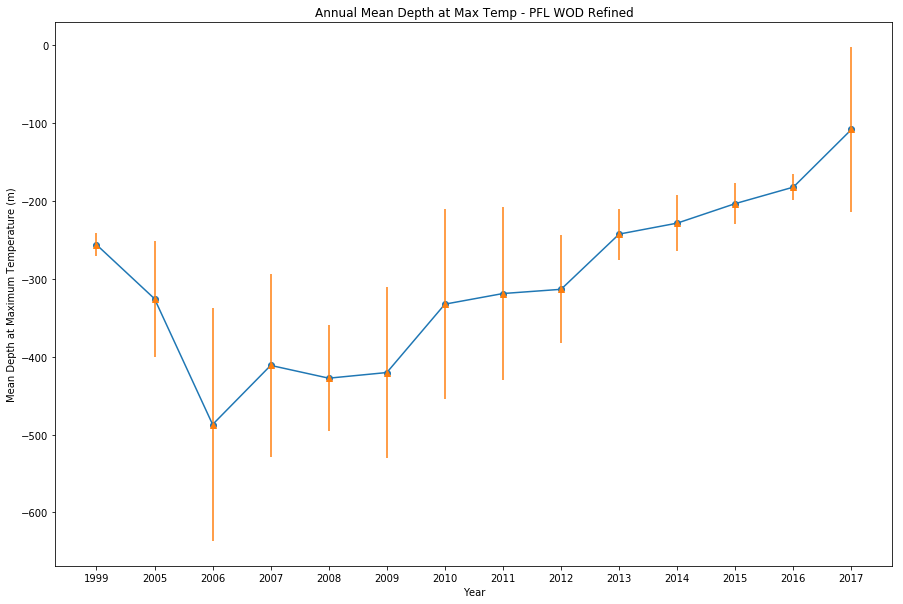

In [14]:
# Plot Annual Mean Depth at Maximum Temperature with Std. Dev. and annual datapoints count
df6 = df2['MaxDepth'].groupby(df2['YearTime'].str[:4]).agg(['mean', 'std', 'count']).reset_index()
print (df6)

x = df6['YearTime']
y = df6['mean'] # Mean dataframe
e = df6['std'] # Standarad deviation dataframe

plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Mean Depth at Maximum Temperature (m)')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Annual Mean Depth at Max Temp - PFL WOD Refined')
plt.show()

In [ ]:
# Plot Annual Mean Depth at Maximum Temperature with Std. Dev. and annual datapoints count
df6m = df2['MaxDepth'].groupby(df2['YearTime'].str[:7]).agg(['mean', 'count']).reset_index()
print (df6m)

x = df6m['YearTime']
y = df6m['mean'] # Mean dataframe

with open("path\csvfile", "a")  as f: # WRONG DATA!!
    table4 = df6m.to_csv(f, sep=',', header=False)

plt.figure(figsize=(120,50))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('Mean Depth at Maximum Temperature')
plt.title('Monthly Mean Depth at Max Temp - PFL WOD Refined')
plt.show()

   YearTime       mean       std  count
0      1999  34.855571  0.003377      6
1      2005  34.861691  0.003997    158
2      2006  34.857848  0.014429    228
3      2007  34.854668  0.021254     96
4      2008  34.858606  0.002888    720
5      2009  34.855222  0.004267    218
6      2010  34.856731  0.002670    344
7      2011  34.844023  0.105661    320
8      2012  34.855169  0.003795     86
9      2013  34.856880  0.009354    158
10     2014  34.850204  0.037278    546
11     2015  34.857403  0.003397    342
12     2016  34.858127  0.002221    112
13     2017  34.523076  0.351290     20


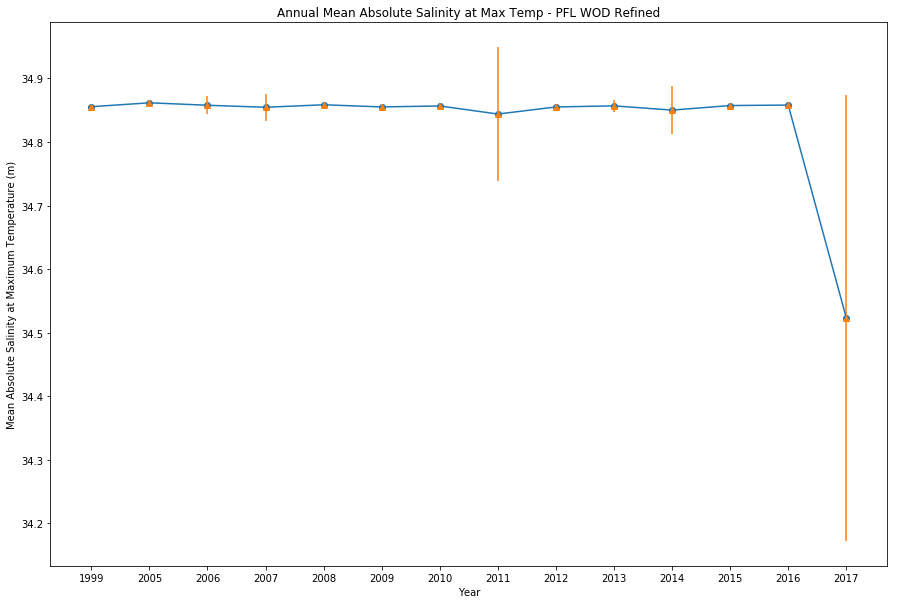

In [4]:
# Plot Annual Mean Absolute Salinities at Maximum Temperature with Std. Dev. and annual datapoints count
df7 = df2['Absolute_Salinity_MaxTemp'].groupby(df2['YearTime'].str[:4]).agg(['mean', 'std', 'count']).reset_index()
print (df7)

with open("path\csvfile", "a")  as f: # Save dataframe into a csv file
    table1 = df7.to_csv(f, sep=',', header=False)

x = df7['YearTime']
y = df7['mean'] # Mean dataframe
e = df7['std'] # Standard deviation dataframe

plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Mean Absolute Salinity at Maximum Temperature (m)')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Annual Mean Absolute Salinity at Max Temp - PFL WOD Refined')
plt.show()

In [ ]:
# Plot Monthly Mean Absolute Salinity at Maximum Temperature
df7m = df2['Absolute_Salinity_MaxTemp'].groupby(df2['YearTime'].str[:7]).agg(['mean', 'count']).reset_index()
#print (df7m)

x = df7m['YearTime']
y = df7m['mean'] # Mean dataframe

plt.figure(figsize=(120,50))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('Mean Absolute Salinity at Maximum Temperature')
plt.title('Monthly Mean Absolute Salinity at Max Temp - PFL WOD Refined')
plt.show()

   YearTime       mean       std  count
0      1999  34.684001  0.003099      6
1      2005  34.689975  0.004001    158
2      2006  34.685841  0.014371    228
3      2007  34.682816  0.021213     96
4      2008  34.686499  0.002856    720
5      2009  34.683257  0.004236    218
6      2010  34.685264  0.002683    344
7      2011  34.672444  0.104806    320
8      2012  34.683403  0.003841     86
9      2013  34.685582  0.009440    158
10     2014  34.678992  0.036968    546
11     2015  34.686445  0.003296    342
12     2016  34.687363  0.002250    112
13     2017  34.354889  0.348502     20


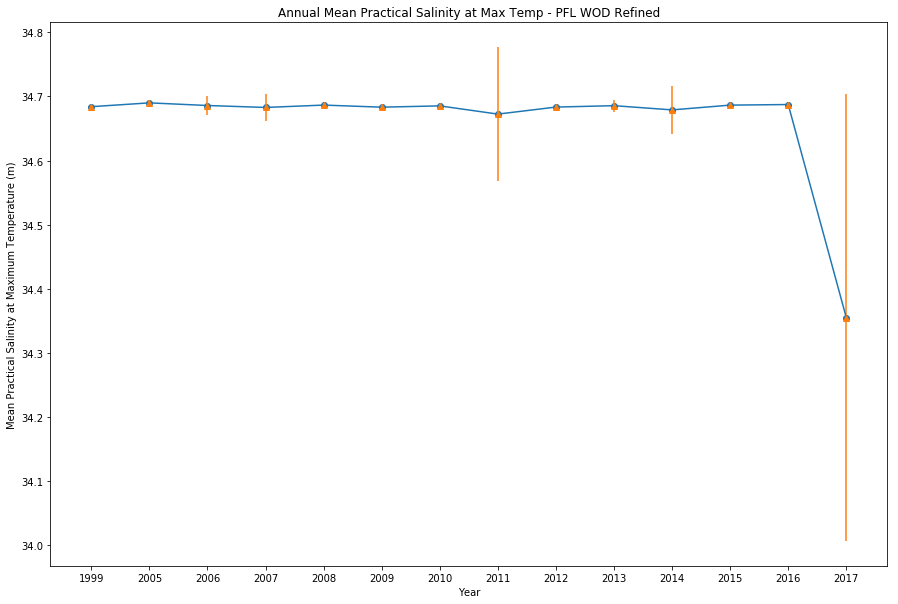

In [5]:
# Plot Annual Mean Practical Salinity at Maximum Temperature with Std. Dev. and annual datapoints count
df8 = df2['Practical_Salinity_MaxTemp'].groupby(df2['YearTime'].str[:4]).agg(['mean', 'std', 'count']).reset_index()
#print(df8)

with open("path\csvfile", "a")  as f: # Save dataframe into csv file
    table2 = df8.to_csv(f, sep=',', header=False)

x = df8['YearTime']
y = df8['mean'] # Mean dataframe
e = df8['std'] # Standard deviation dataframe

plt.figure(figsize=(15,10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Year')
plt.ylabel('Mean Practical Salinity at Maximum Temperature (m)')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Annual Mean Practical Salinity at Max Temp - PFL WOD Refined')
plt.show()

    YearTime       mean  count
0    1999-12  34.684001      6
1    2005-01  34.692387      6
2    2005-02  34.691366      6
3    2005-03  34.689818     22
4    2005-04  34.688883     26
5    2005-05  34.692254     10
6    2005-06  34.692668      6
7    2005-07  34.689201     10
8    2005-08  34.691751     16
9    2005-09  34.690000     16
10   2005-10  34.688750     16
11   2005-11  34.689000     16
12   2005-12  34.688000      8
13   2006-01  34.689531     22
14   2006-02  34.689323     20
15   2006-03  34.688816     30
16   2006-04  34.688243     40
17   2006-05  34.686497     14
18   2006-06  34.687667     12
19   2006-07  34.687167     12
20   2006-08  34.684143     14
21   2006-09  34.686500     12
22   2006-10  34.686600     10
23   2006-11  34.686001     12
24   2006-12  34.673281     30
25   2007-01  34.687280     30
26   2007-02  34.674041     32
27   2007-03  34.687810     18
28   2007-04  34.687157     12
29   2007-12  34.684032      4
..       ...        ...    ...
91   201

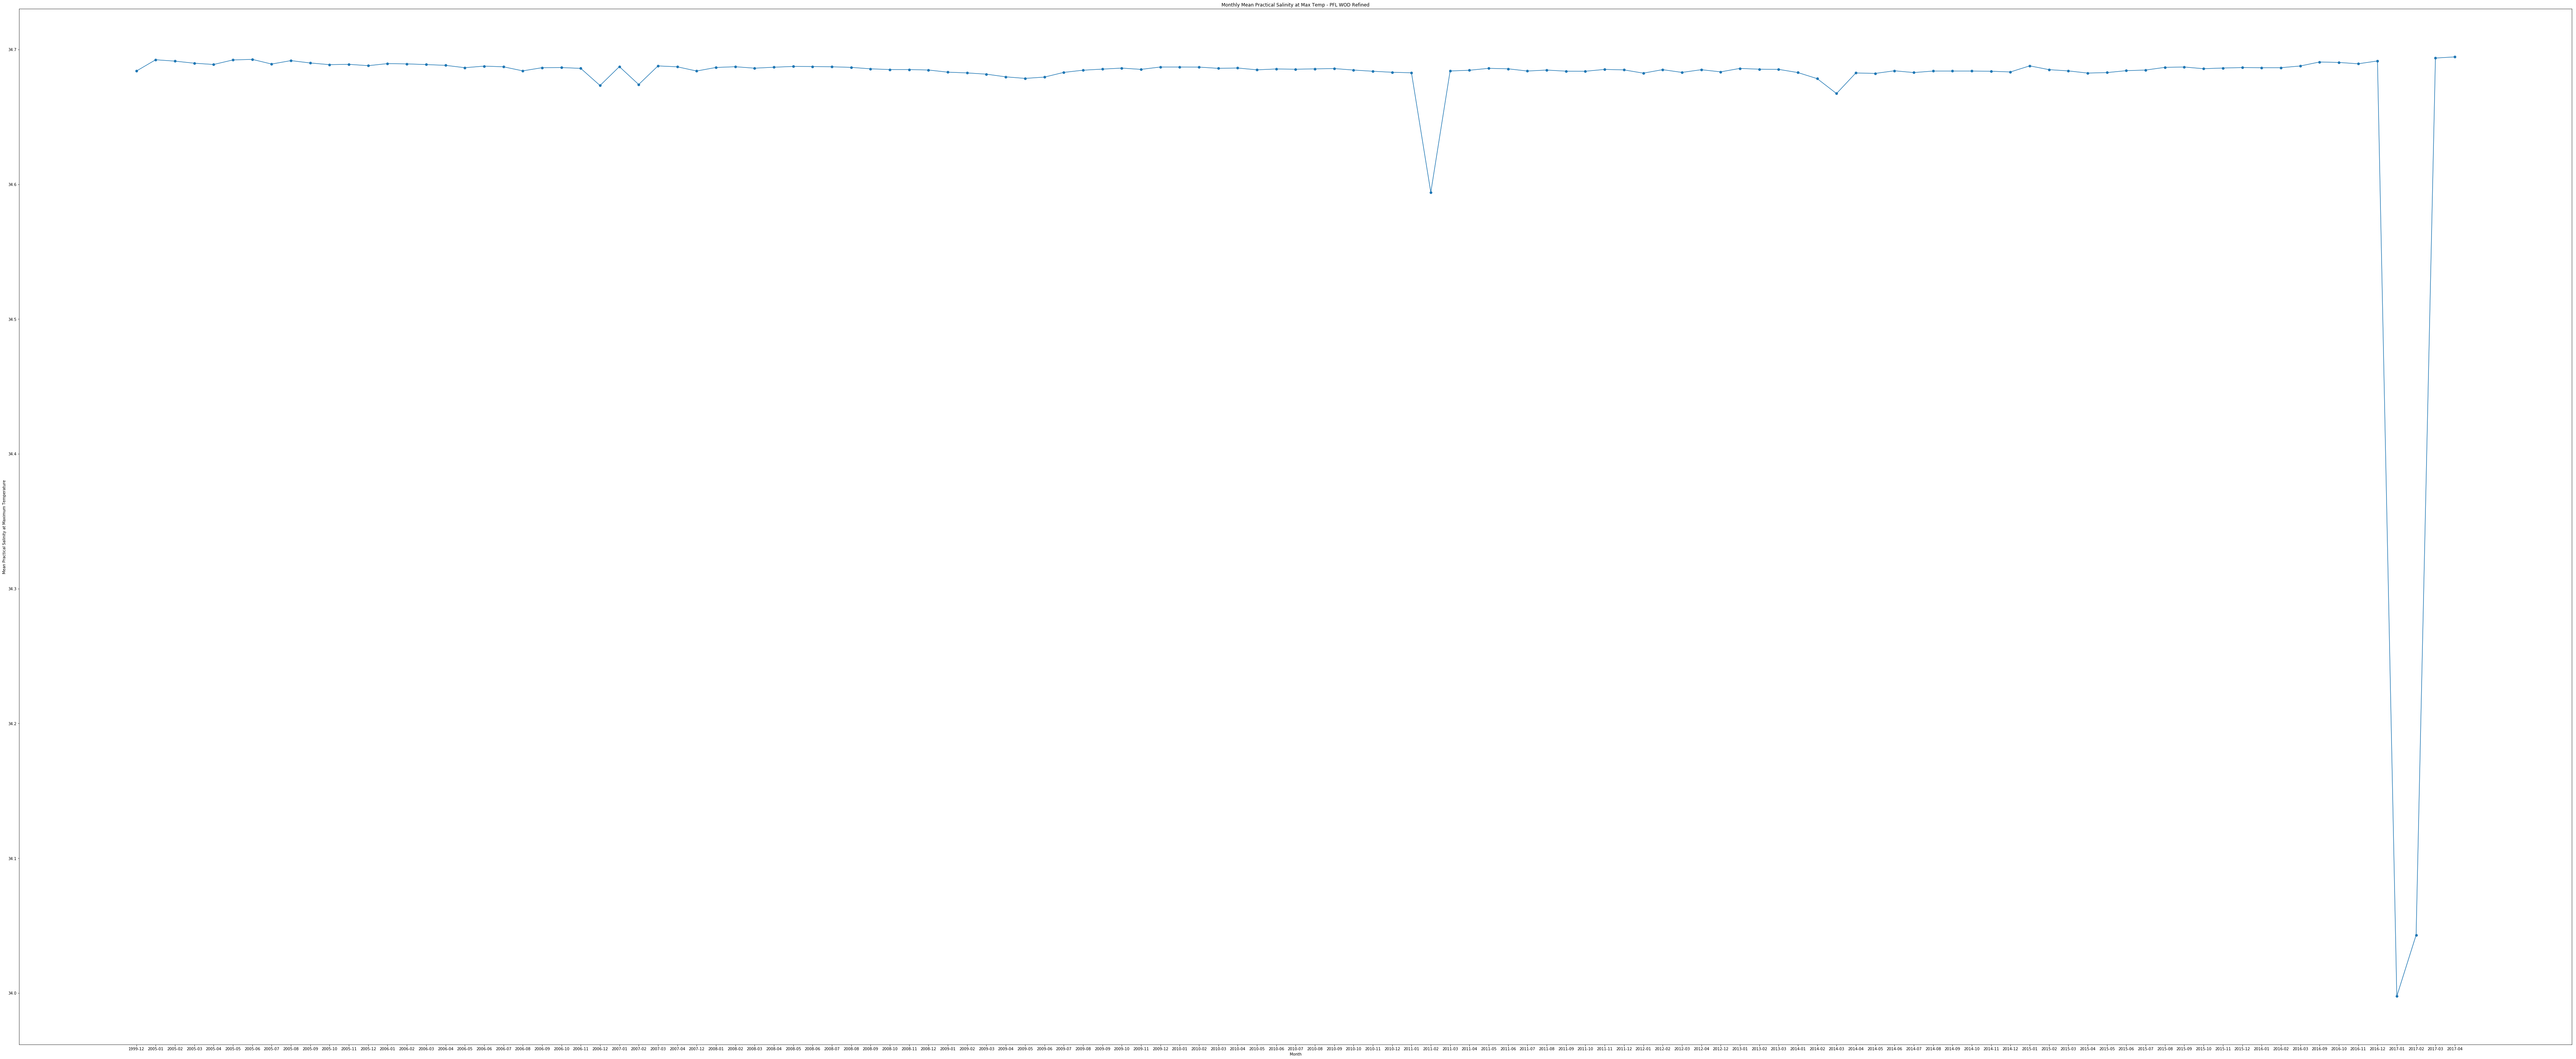

In [7]:
# Plot Monthly Mean Practical Salinity at Maximum Temperature
df8m = df2['Practical_Salinity_MaxTemp'].groupby(df2['YearTime'].str[:7]).agg(['mean', 'count']).reset_index()
print (df8m)

with open("path\csvfile", "a")  as f: # Save dataframe into csv file
    table2 = df8m.to_csv(f, sep=',', header=False)

x = df8m['YearTime']
y = df8m['mean'] # Mean dataframe

plt.figure(figsize=(120,50))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('Mean Practical Salinity at Maximum Temperature')
plt.title('Monthly Mean Practical Salinity at Max Temp - PFL WOD Refined')
plt.show()